this is just a draft

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from collections import Counter
import re



<Axes: xlabel='label'>

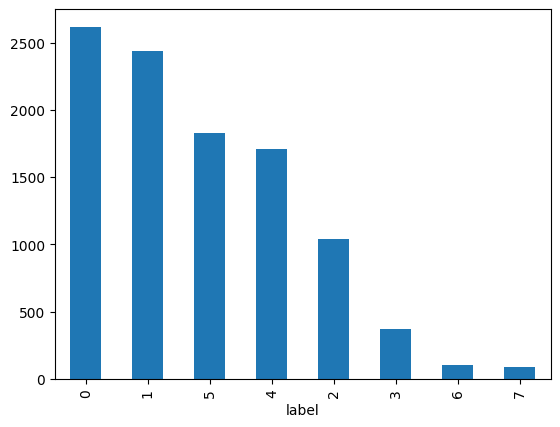

In [112]:
df = pd.read_csv('train.csv')

df.label.value_counts().plot.bar()

In [113]:
def plot_words_freq():
    def tokenize(text):
        return re.findall(r'\b\w+\b', text.lower())

    # Function to get most frequent words for each category
    def get_most_frequent_words(df : pd.DataFrame, text_column, label_column, top_n=10):
        category_words = {}
        for label, group in df.groupby(label_column):
            all_words = []
            for text in group[text_column]:
                all_words.extend(tokenize(text))
            word_counts = Counter(all_words)
            category_words[label] = word_counts.most_common(top_n)
        return category_words

    # Calculate most frequent words
    most_frequent_words = get_most_frequent_words(df, text_column='Question', label_column='label', top_n=10)

    # Plot the most frequent words for each category
    for category, words in most_frequent_words.items():
        words, counts = zip(*words)  # Separate words and their counts
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Most Frequent Words in Category: {category}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

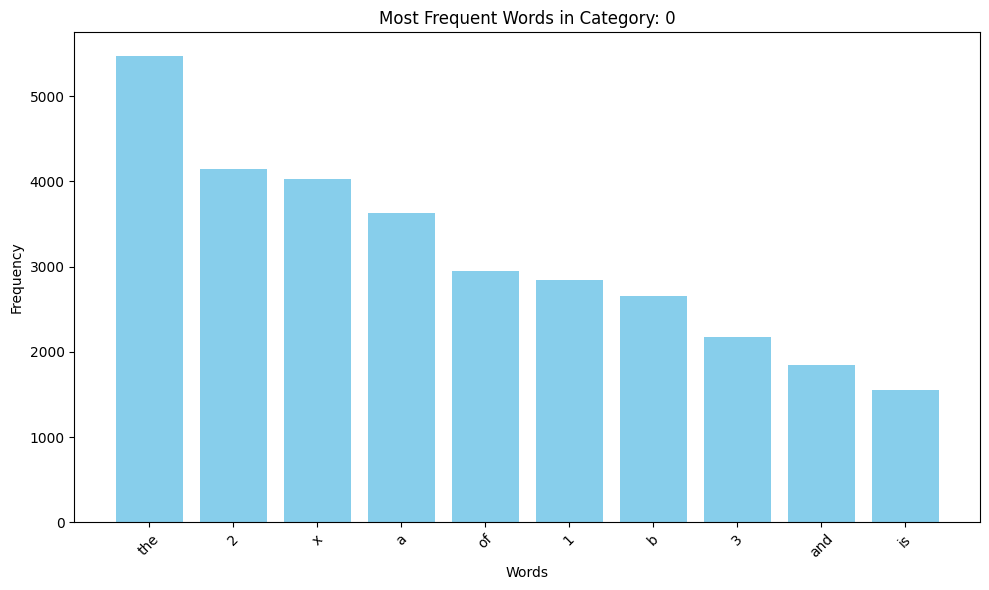

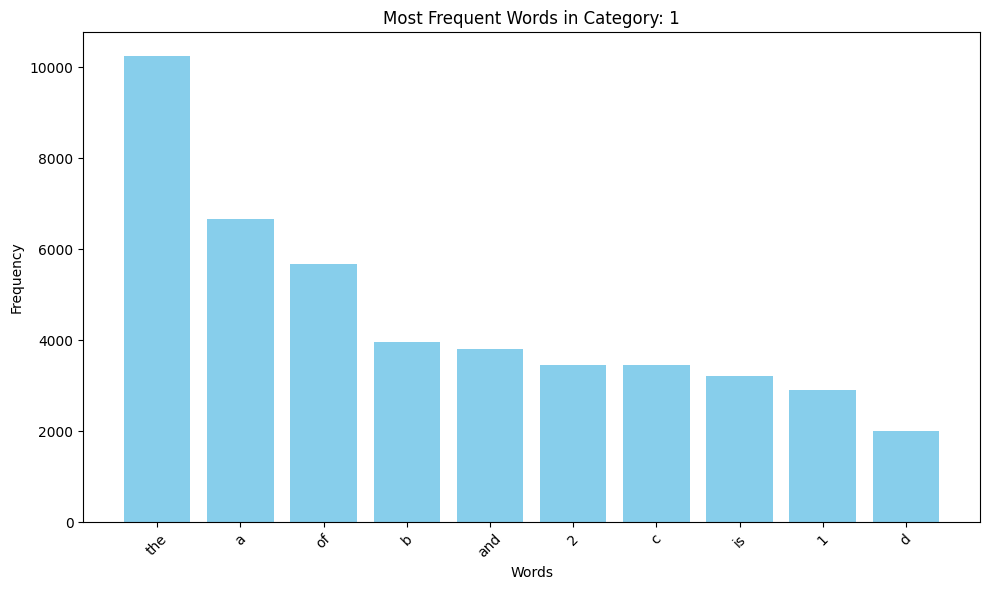

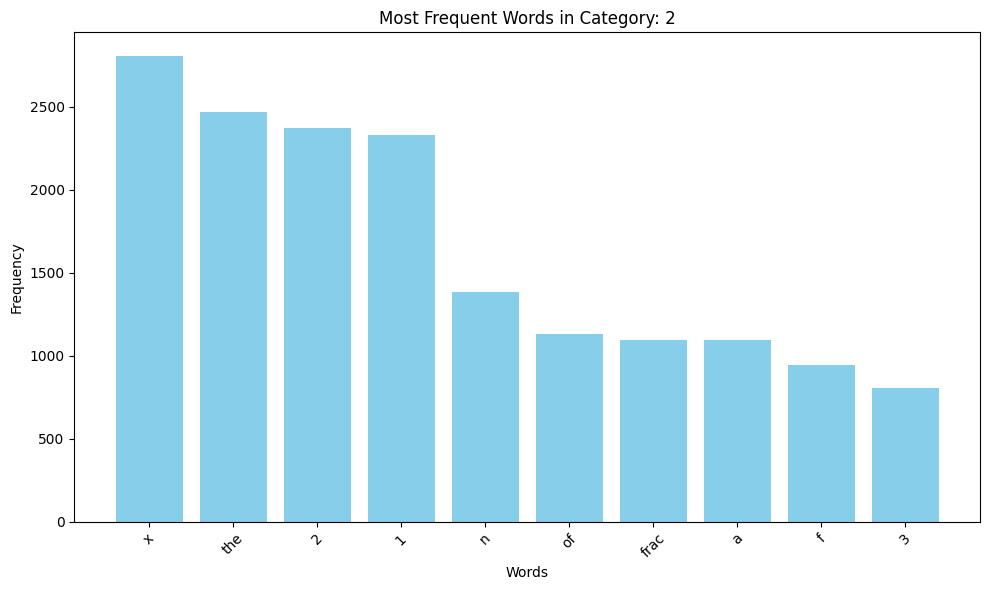

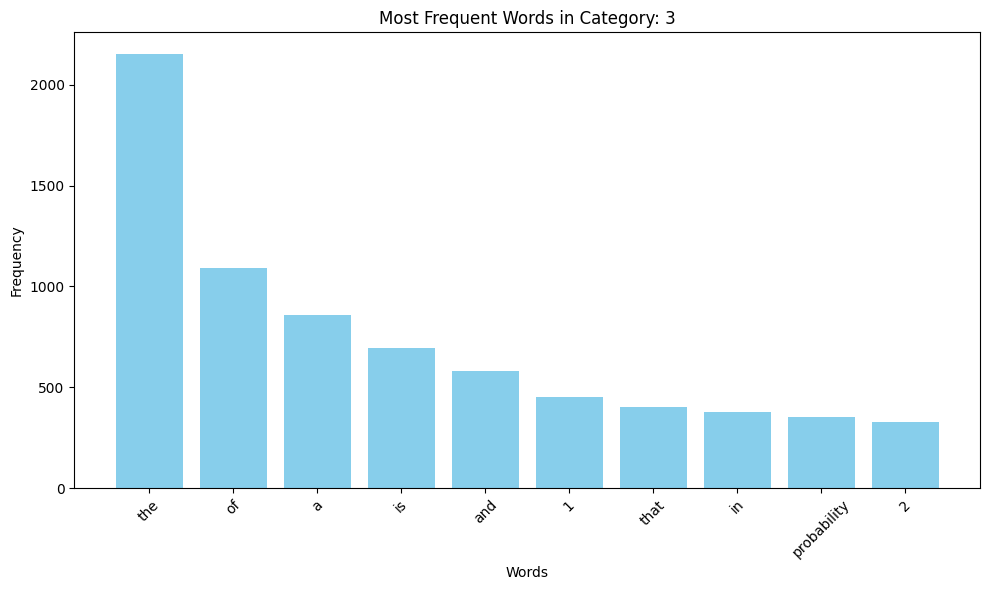

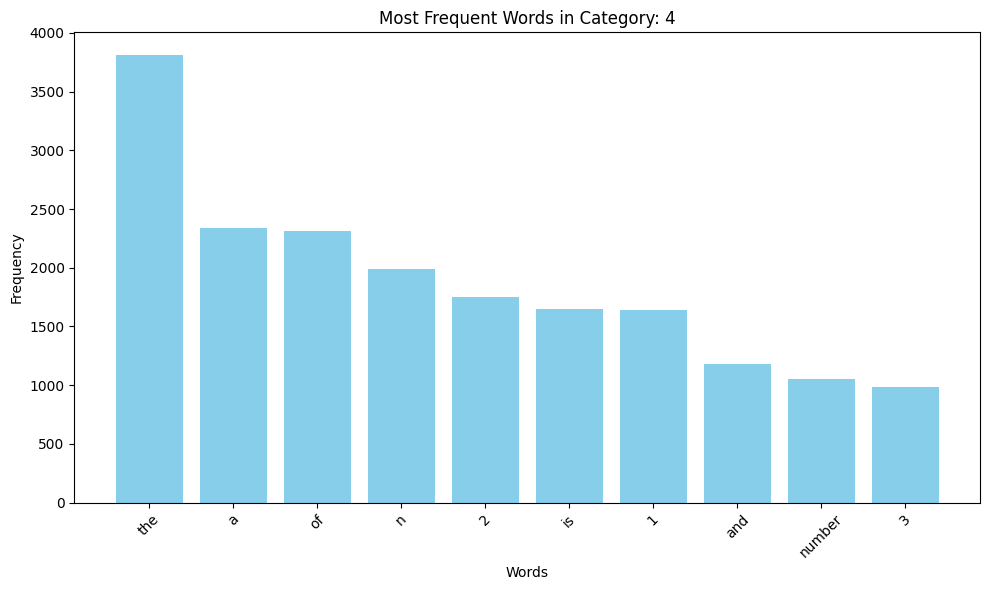

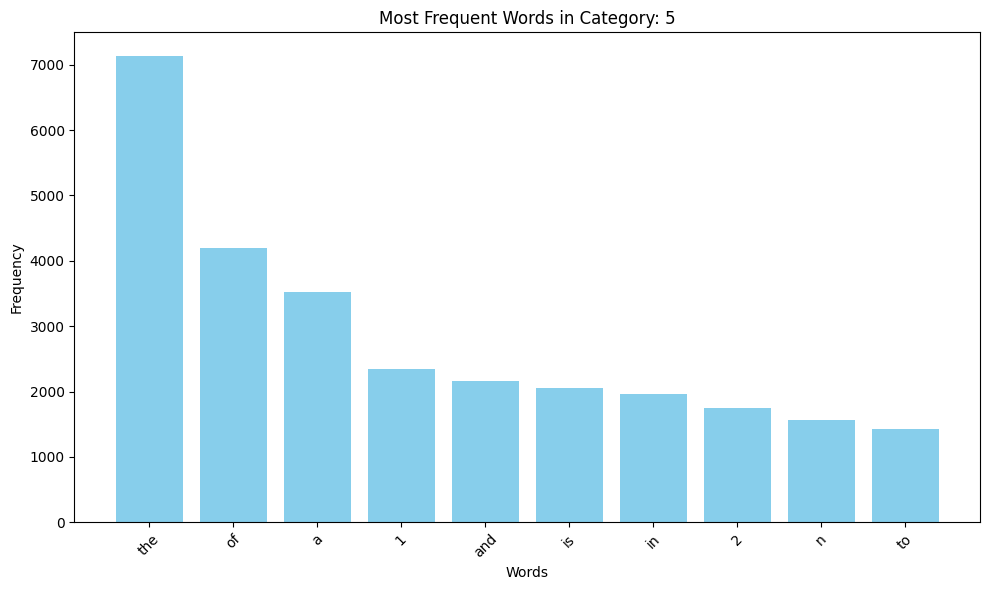

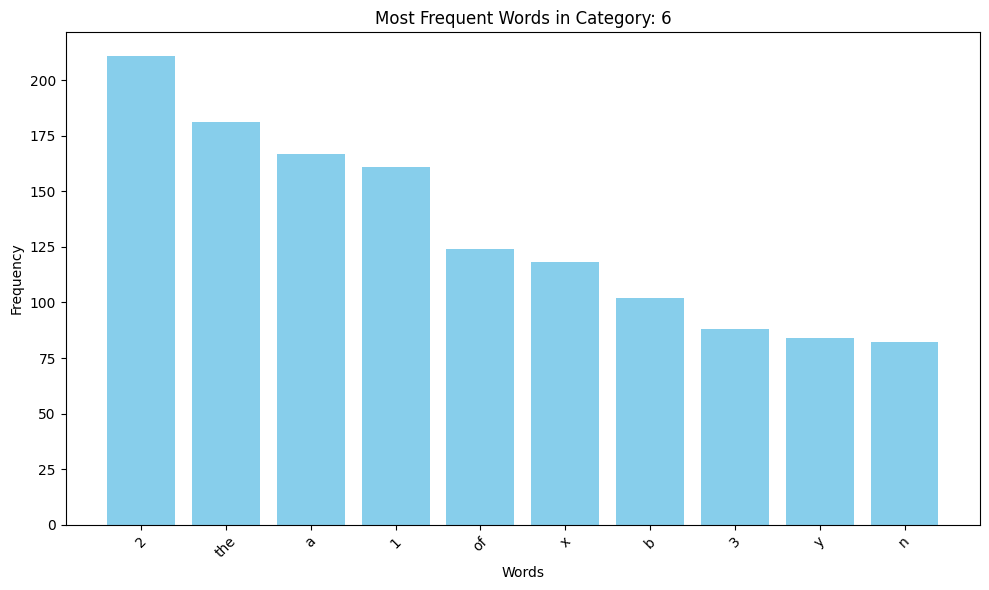

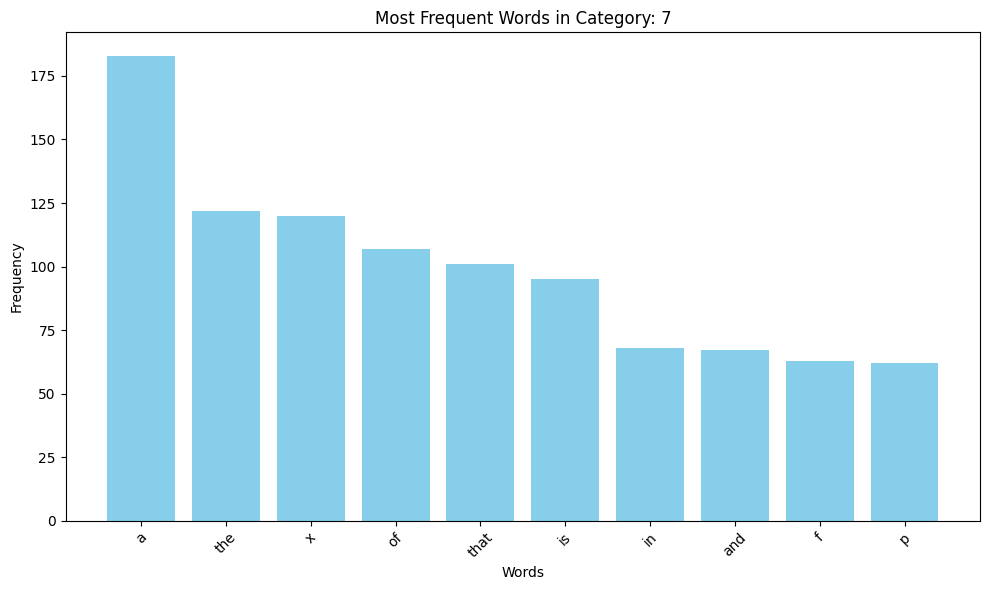

In [114]:
plot_words_freq()

In [115]:
# import string
# # import nltk
# # nltk.download("stopwords")
# from nltk.corpus import stopwords

# redundant_words = ['find', 'let', 
#                    'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 
#                    'number', 'numbers', 'given']

# def remove_punctuation_and_stopwords(question : str):
    
#     q_no_punctuation = [ch for ch in question if ch not in string.punctuation]
#     q_no_punctuation = "".join(q_no_punctuation).split()
#     # print(q_no_punctuation)
#     sms_no_punctuation_no_stopwords = \
#         ' '.join([word.lower() for word in q_no_punctuation 
#                   if word.lower() not in redundant_words 
#                   and word.lower() not in stopwords.words("english") 
#                   and not word.lower().isnumeric()
#                   and word.lower() not in string.ascii_lowercase])
        
#     return sms_no_punctuation_no_stopwords

# df['Question'] = df['Question'].apply(remove_punctuation_and_stopwords)
# df.head()

In [144]:
math_words = pd.read_csv('unique_words.csv')

def filter_question_by_math_words(question : str):
    st = set()
    for word in question.split():
        for math_w  in math_words['math_words'].values:
            if math_w in word.lower():
                st.add(math_w)
    return str(st).replace("{", "").replace("}", "").replace("'", "").replace(",", " ")

df['Question'] = df['Question'].apply(filter_question_by_math_words)
df.head(20)


,Question,label
0,distinct prime probability solitaire appea...,3
1,round loser winner lose min play game r...,5
2,where ^ prime sqrt + integer square rea...,0
3,distinct possible line trapezoid point fo...,1
4,digit position composed decrease even swa...,5
5,per card distribute east divide respectiv...,5
6,circle enclose side draw lose parallel l...,1
7,line axis satisf value point ^ min cent...,1
8,^ sqrt + min function minimum log value...,2
9,order line coordinate west north direct ...,5


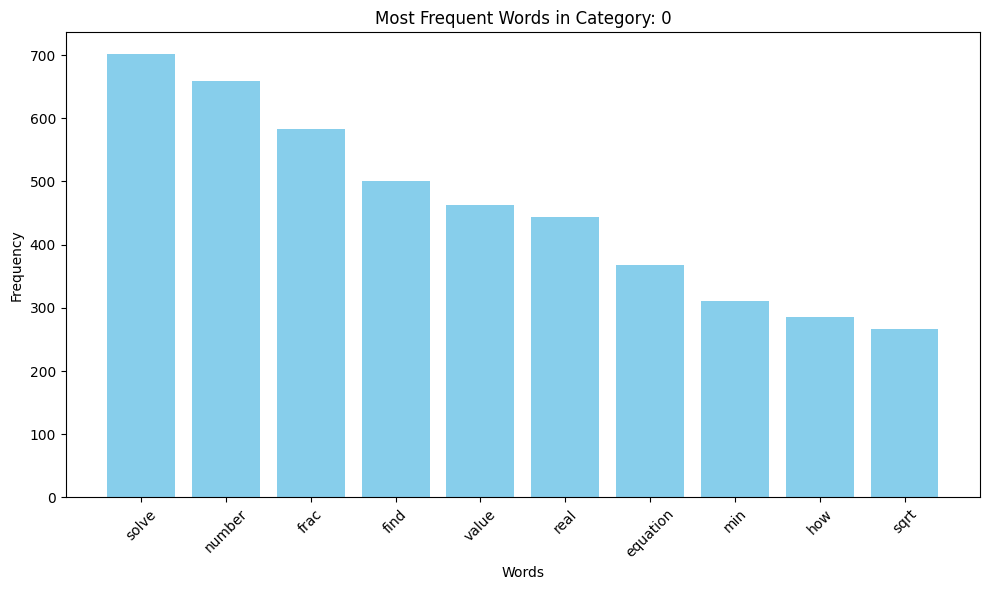

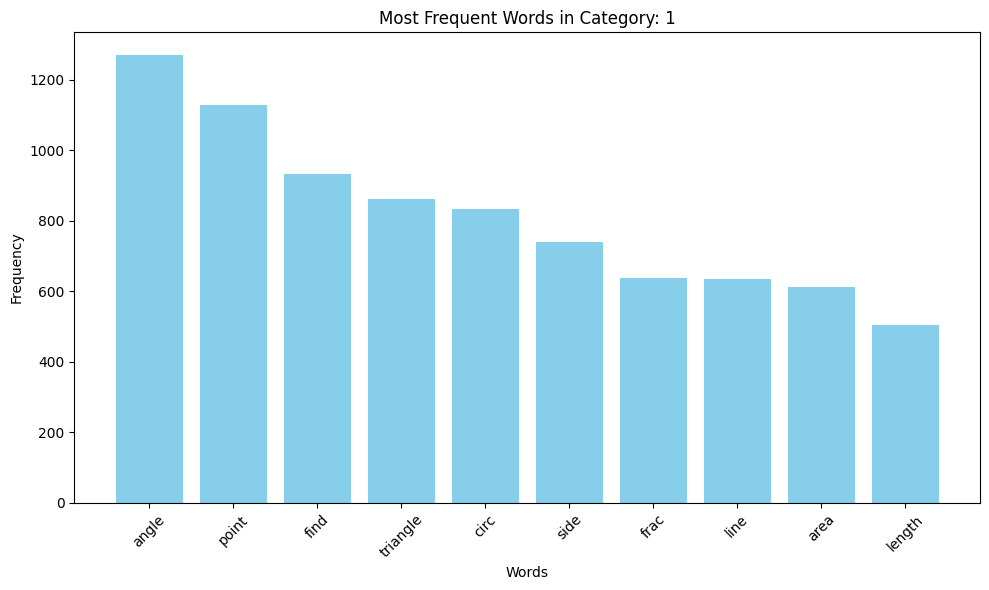

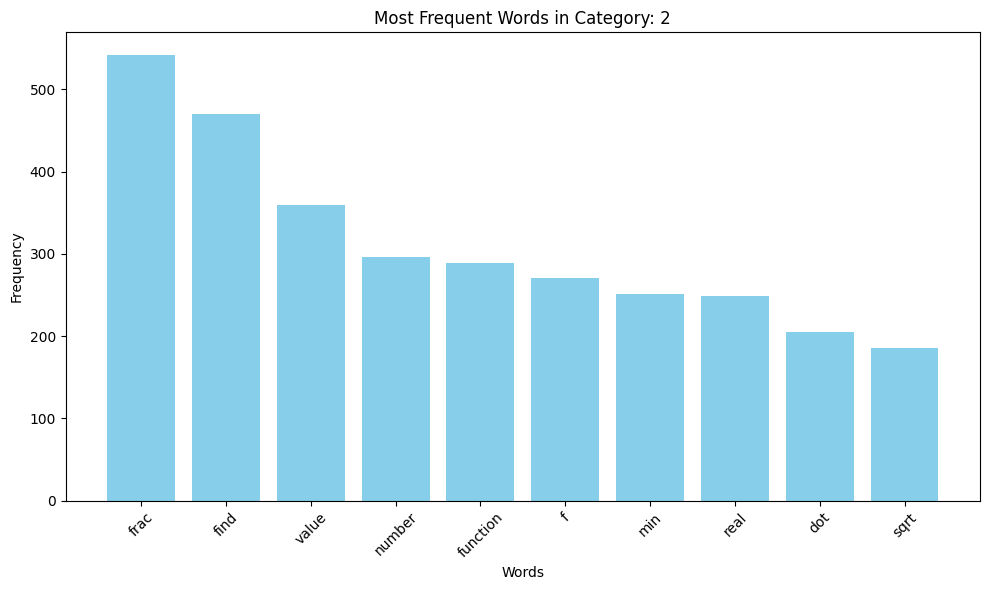

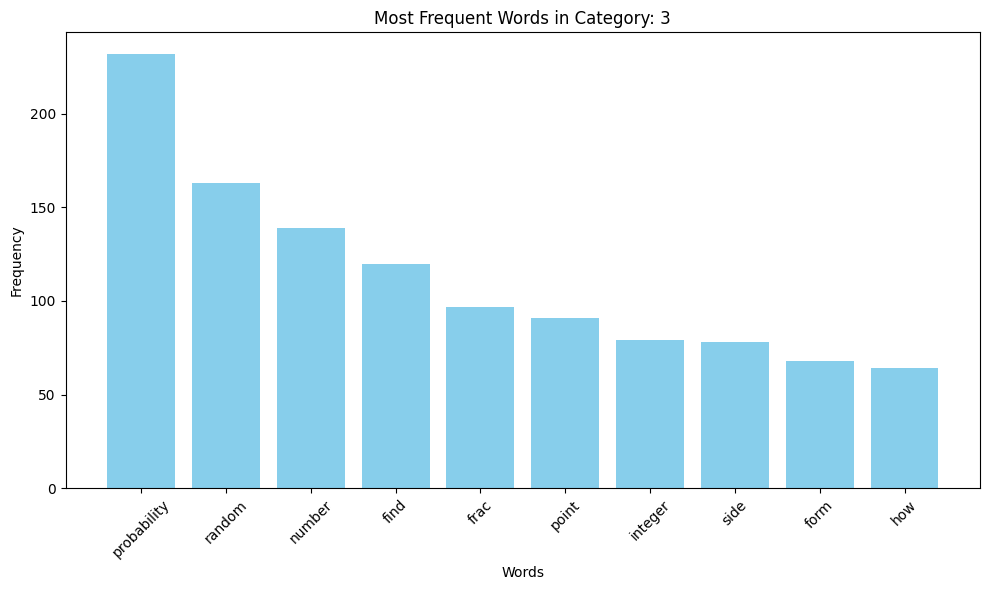

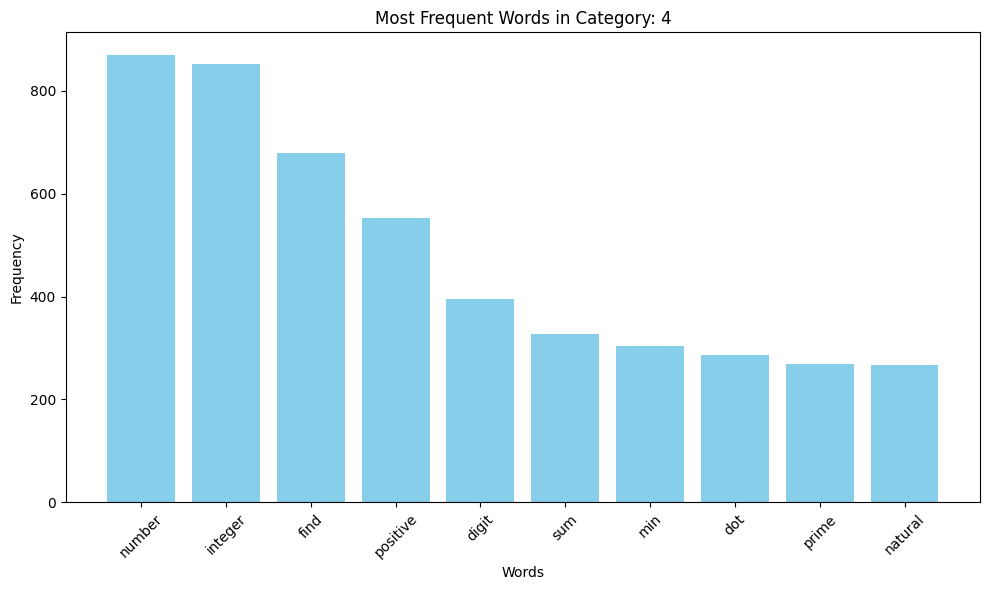

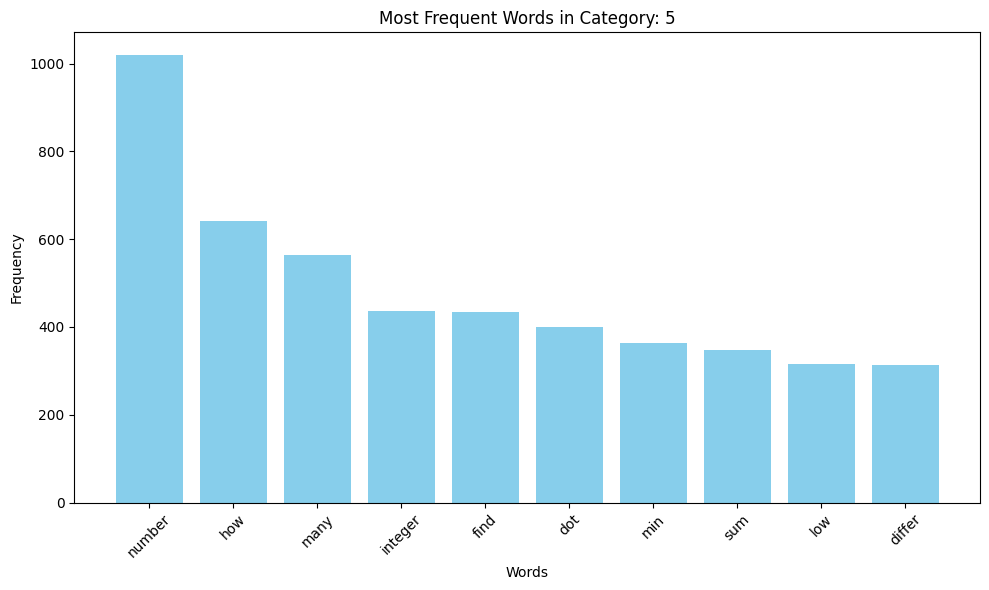

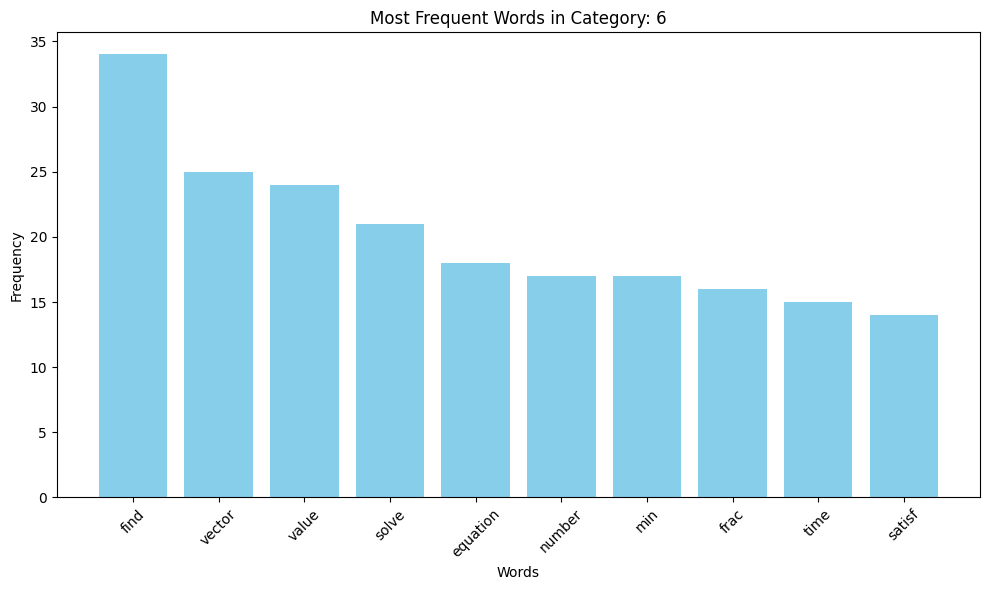

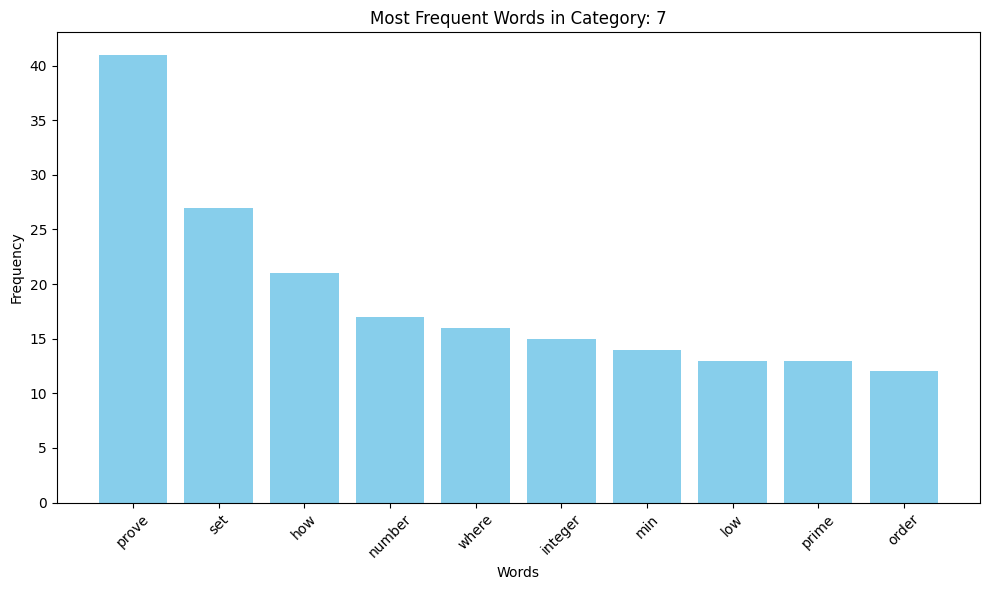

In [137]:
plot_words_freq()

In [138]:
X = df['Question']
y = df['label']

# math_terms = ['real', 'integer' , 'numbers', '\sin', '\cos', 
#               '\tan', 'regular', 'polygon', 'cube', 'hexagon']

# def filter_math_words(text : str):
#     words = re.findall(r'\b\w+\b', text.lower())
#     return ' '.join([word for word in words if word in math_terms])

# X = X.apply(filter_math_words)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [139]:
# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [140]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, criterion='entropy')
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

In [141]:
f1_score(y_test, y_pred, average="micro")


0.7492639842983317

In [142]:
df_test = pd.read_csv('test.csv')
X_test = df_test['Question']
X_test = X_test.apply(filter_question_by_math_words)
Y_test = model.predict(vectorizer.transform(X_test))

In [143]:
ids = df_test['id']

submission = pd.DataFrame({'id': ids, 'label': Y_test})
submission.to_csv('submit.csv', index=False)